https://www.datacamp.com/community/tutorials/wordcloud-python

installing stuff

In [0]:
import numpy as np
import pandas as pd
import io
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

manually copied extracted from instagram

In [0]:
dataset = [
  ["arey maa chudi padi he"],
  ["work eat netflix sleep repeat 😉"],
  ["developing interest in trivial activities"],
  ["how did I get fat? 😜"],
  ["All I can say is internet speed matters 😂😂😂"],
  ["one two three four five"],
  ["you are awesome ❤️❤️❤️"],
  ["dimag ka bh**** ho gaya"],
  ["not able to meet GF 😭"],
  ["I am fucking rocking"],
  ["me toh boht bore hogyi"],
  ["waking not bathing eating sleeping"],
  ["bhai kya bakchodi karra he"],
  ["qurantine me chutya hogya he"]
]

In [105]:
df = pd.DataFrame(dataset,columns=["replies"])
df.head()

,replies
0,arey maa chudi padi he
1,work eat netflix sleep repeat 😉
2,developing interest in trivial activities
3,how did I get fat? 😜
4,All I can say is internet speed matters 😂😂😂


pretty basic word cloud

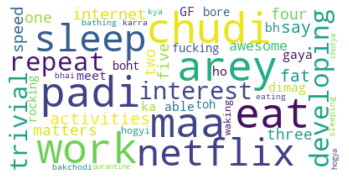

In [106]:
# replies = df.description["replies"]
replies = " ".join(df.replies)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=STOPWORDS).generate(replies)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[image](https://stock.adobe.com/images/boredom-concept-bored-male-teenager-thinking-with-face-leaning-on-his-hands-for-reflection-gray-background/106300410) credits

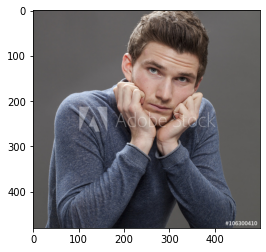

In [107]:
import requests

response = requests.get("https://as1.ftcdn.net/jpg/01/06/30/04/500_F_106300410_D8wOZolm77yYjytAm9LUzMJjqClGAHME.jpg")
image = Image.open(io.BytesIO(response.content))

plt.imshow(image)

making above image as mask

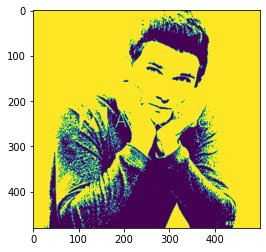

In [108]:
boredom_mask = np.asarray(image.convert('L'))
boredom_mask = (boredom_mask > 80) * 1
plt.imshow(boredom_mask)

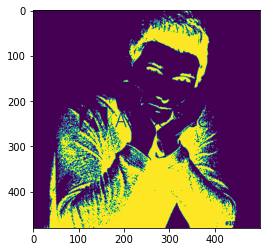

In [109]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_boredom_mask = np.ndarray((boredom_mask.shape[0],boredom_mask.shape[1]), np.int32)
for i in range(len(boredom_mask)):
    transformed_boredom_mask[i] = list(map(transform_format, boredom_mask[i]))

plt.imshow(transformed_boredom_mask)

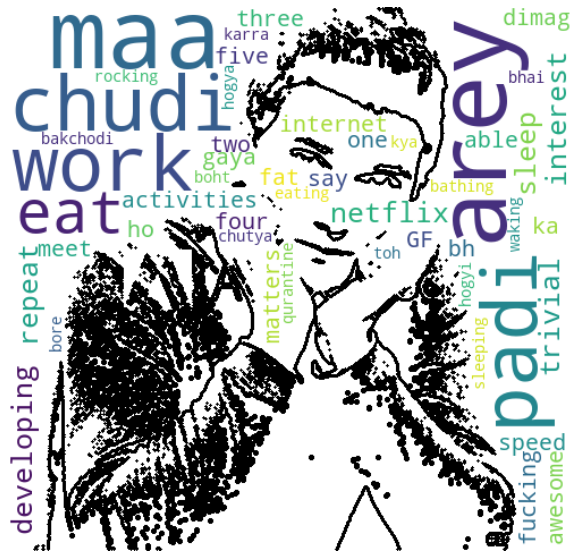

In [110]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_boredom_mask, contour_width=3).generate(replies)
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()